In [194]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, Sequential,models

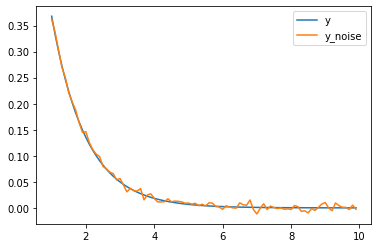

In [213]:
# 模拟数据
x = np.arange(1,10,0.1)
y = np.exp(-x)
y_noise = y + np.random.normal(size=y.shape)*0.005
plt.plot(x,y,label="y")
plt.plot(x,y_noise,label="y_noise")
plt.legend()
plt.show()

In [214]:
# 自监督构建数据集
def create_data(y_noise,time_stamp = 10):
    data = []
    labels = []
    for i in range(time_stamp, len(y_noise)):
        data.append(y_noise[i-time_stamp:i])
        labels.append(y_noise[i])
    data,labels = np.array(data),np.array(labels)
    data,labels = np.expand_dims(data,axis=-1),np.expand_dims(labels,axis=-1)
    print(f"data.shape:{data.shape} labels.shape:{labels.shape}")
    return data,labels

In [215]:
data,labels=create_data(y_noise)

data.shape:(80, 10, 1) labels.shape:(80, 1)


In [216]:
# 数据划分
train_X,test_X,train_y,test_y = train_test_split(data,labels,test_size=0.3,random_state=17)
print(f"train_X.shape:{train_X.shape} train_y.shape:{train_y.shape}")
print(f"test_X.shape:{test_X.shape} test_y.shape:{test_y.shape}")

train_X.shape:(56, 10, 1) train_y.shape:(56, 1)
test_X.shape:(24, 10, 1) test_y.shape:(24, 1)


# 模型构建

In [217]:
# 超参数
epochs = 30
batch_size = 16
# LSTM 参数: return_sequences=True LSTM输出为一个序列。默认为False，输出一个值。
# input_dim： 输入单个样本特征值的维度
# input_length： 输入的时间点长度
model = Sequential()
model.add(layers.LSTM(units=100, return_sequences=True, input_dim=train_X.shape[-1], input_length=train_X.shape[1]))
model.add(layers.LSTM(units=50))
model.add(layers.Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 10, 100)           40800     
                                                                 
 lstm_17 (LSTM)              (None, 50)                30200     
                                                                 
 dense_8 (Dense)             (None, 1)                 51        
                                                                 
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
_________________________________________________________________


In [218]:
history = model.fit(train_X, train_y, epochs=epochs, batch_size=batch_size, verbose=1)

Epoch 1/30
4/4 [==============================] - 2s 9ms/step - loss: 9.6692e-04
Epoch 2/30
4/4 [==============================] - 0s 8ms/step - loss: 2.9946e-04
Epoch 3/30
4/4 [==============================] - 0s 9ms/step - loss: 1.1287e-04
Epoch 4/30
4/4 [==============================] - 0s 9ms/step - loss: 1.5853e-04
Epoch 5/30
4/4 [==============================] - 0s 9ms/step - loss: 4.9443e-05
Epoch 6/30
4/4 [==============================] - 0s 9ms/step - loss: 6.6044e-05
Epoch 7/30
4/4 [==============================] - 0s 9ms/step - loss: 9.4285e-05
Epoch 8/30
4/4 [==============================] - 0s 8ms/step - loss: 5.2621e-05
Epoch 9/30
4/4 [==============================] - 0s 9ms/step - loss: 3.8215e-05
Epoch 10/30
4/4 [==============================] - 0s 9ms/step - loss: 2.7571e-05
Epoch 11/30
4/4 [==============================] - 0s 9ms/step - loss: 4.7928e-05
Epoch 12/30
4/4 [==============================] - 0s 9ms/step - loss: 2.6082e-05
Epoch 13/30
4/4 [========

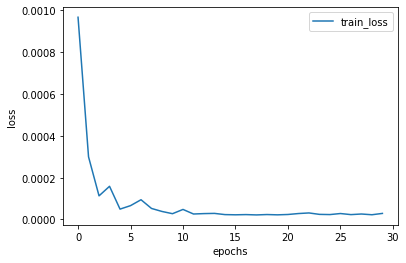

In [219]:
train_loss = history.history["loss"]

plt.plot(train_loss,label="train_loss")
plt.legend()
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

In [220]:
predict_y = model.predict(test_X)

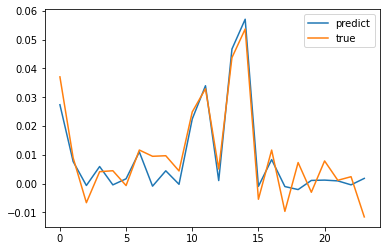

In [221]:
plt.plot(predict_y,label="predict")
plt.plot(test_y,label="true")
plt.legend()
plt.show()

In [222]:
predict = model.predict(data)

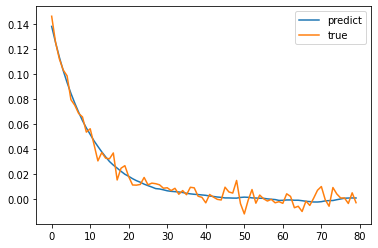

In [223]:
plt.plot(predict,label="predict")
plt.plot(labels,label="true")
plt.legend()
plt.show()

# 预测新的数据

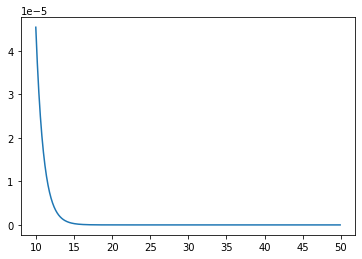

In [229]:
x_not_look = np.arange(10,50,0.1)
y_not_look = np.exp(-x_not_look)
plt.plot(x_not_look,y_not_look)

In [230]:
data_not_look,labels_not_look = create_data(y_not_look)

data.shape:(390, 10, 1) labels.shape:(390, 1)


In [231]:
np.expand_dims(data_not_look[0],axis=0)

array([[[4.53999298e-05],
        [4.10795552e-05],
        [3.71703187e-05],
        [3.36330952e-05],
        [3.04324830e-05],
        [2.75364493e-05],
        [2.49160097e-05],
        [2.25449379e-05],
        [2.03995034e-05],
        [1.84582340e-05]]])

In [232]:
length = data_not_look.shape[0]
x = np.expand_dims(data_not_look[0],axis=0)
predict = list(x[0,:,0])

head = 0
tail = 10
predict[head:tail]
while(tail <= length):
    temp = np.expand_dims(predict[head:tail],axis=0)
    temp = np.expand_dims(temp,axis=-1)
    predict.append(model.predict(temp)[0][0])
    head += 1
    tail += 1
predict

[4.5399929762484854e-05,
 4.1079555225300724e-05,
 3.7170318684126734e-05,
 3.363309518571903e-05,
 3.043248300840368e-05,
 2.7536449349747206e-05,
 2.491600973150325e-05,
 2.254493791321225e-05,
 2.0399503411171993e-05,
 1.8458233995780623e-05,
 -0.00042928604,
 -0.00044436345,
 -0.00046905398,
 -0.0005002029,
 -0.00053535774,
 -0.0005727331,
 -0.00061109057,
 -0.00064960844,
 -0.0006877625,
 -0.0007252353,
 -0.0007618456,
 -0.0007810219,
 -0.0008007367,
 -0.0008201224,
 -0.00083863083,
 -0.00085594226,
 -0.00087189395,
 -0.0008864235,
 -0.0008995293,
 -0.0009112448,
 -0.0009216225,
 -0.0009307243,
 -0.00093922263,
 -0.00094704935,
 -0.00095419434,
 -0.00096068066,
 -0.0009665517,
 -0.0009718578,
 -0.0009766524,
 -0.0009809887,
 -0.0009849163,
 -0.0009884838,
 -0.0009917339,
 -0.0009946863,
 -0.0009973627,
 -0.0009997884,
 -0.0010019859,
 -0.0010039778,
 -0.0010057845,
 -0.0010074229,
 -0.0010089097,
 -0.0010102586,
 -0.001011483,
 -0.0010125936,
 -0.0010136,
 -0.0010145131,
 -0.00101

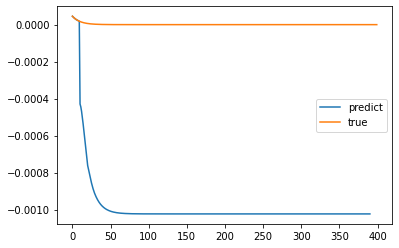

In [233]:
plt.plot(predict,label="predict")
plt.plot(y_not_look,label="true")
plt.legend()
plt.show()